In [1]:
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister, execute
from qiskit.circuit.library.standard_gates import XGate
from qiskit.visualization import plot_histogram
import numpy as np

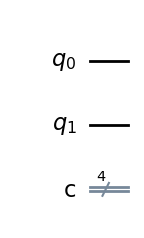

In [2]:
qc = QuantumCircuit(2, 4)
qc.draw('mpl')

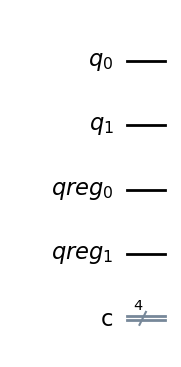

In [3]:
qreg = QuantumRegister(2, 'qreg')
qc.add_register(qreg)
qc.draw('mpl')

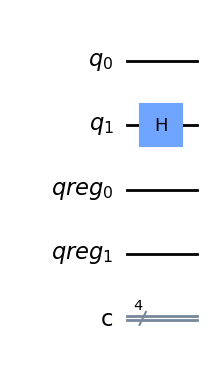

In [4]:
qc.h(1)
qc.draw('mpl')

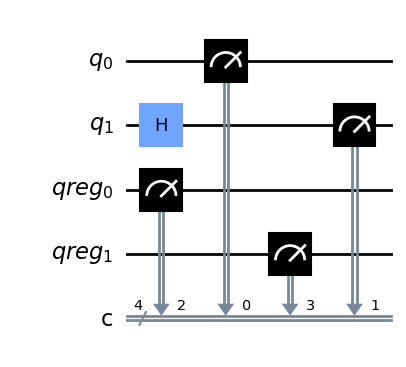

In [5]:
qc.measure(range(4), range(4))
qc.draw('mpl')

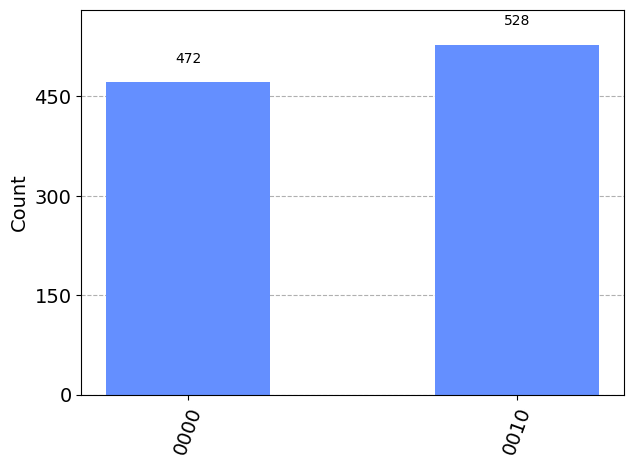

In [6]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots = 1000).result()
counts = result.get_counts()
plot_histogram(counts)

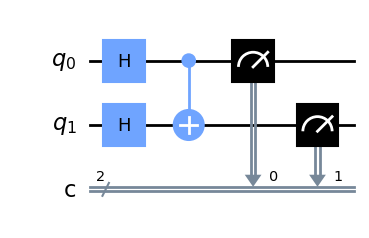

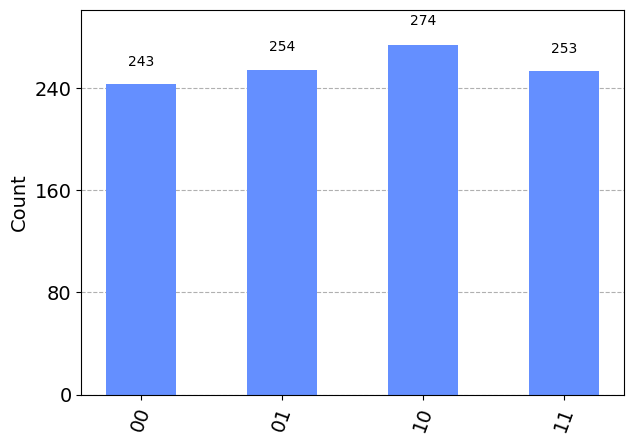

In [7]:
cx_demo = QuantumCircuit(2, 2)
cx_demo.h(range(2))
cx_demo.cx(0, 1)
cx_demo.measure(range(2), range(2))
display(cx_demo.draw('mpl'))

counts_cx = execute(cx_demo, backend).result().get_counts()
plot_histogram(counts_cx)

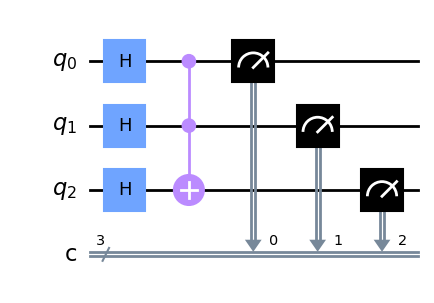

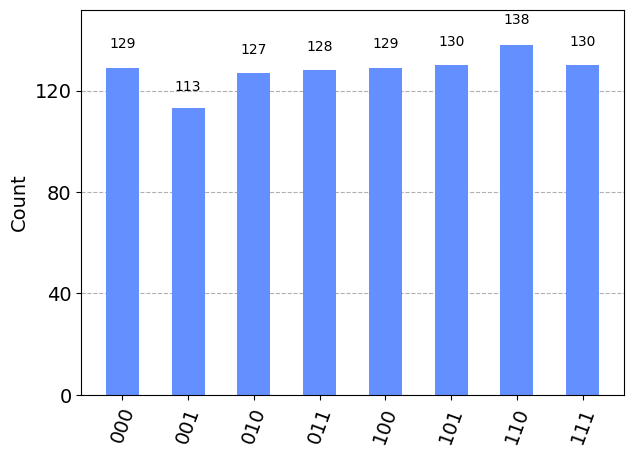

In [8]:
ccx_demo = QuantumCircuit(3, 3)
ccx_demo.h(range(3))
ccx_demo.ccx(0, 1, 2)
ccx_demo.measure(range(3), range(3))
display(ccx_demo.draw('mpl'))

counts_ccx = execute(ccx_demo, backend).result().get_counts()
plot_histogram(counts_ccx)

In [9]:
N = 3
n = int(np.ceil(np.log2(N+1)))
a = QuantumRegister(N, 'a')
b = QuantumRegister(N, 'b')
d = QuantumRegister(n, 'd')
result = ClassicalRegister(n, 'result')

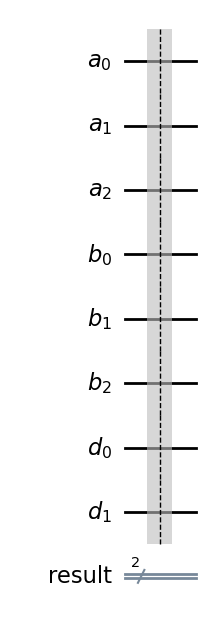

In [10]:
qc_hamming = QuantumCircuit()
qc_hamming.add_register(a)
qc_hamming.add_register(b)
qc_hamming.add_register(d)
qc_hamming.add_register(result)

qc_hamming.barrier()

qc_hamming.draw('mpl')

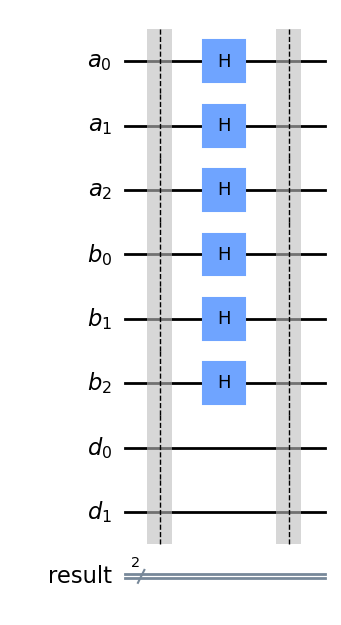

In [11]:
[qc_hamming.h(a[i]) for i in range(3)]
[qc_hamming.h(b[i]) for i in range(3)]

qc_hamming.barrier()

qc_hamming.draw('mpl')

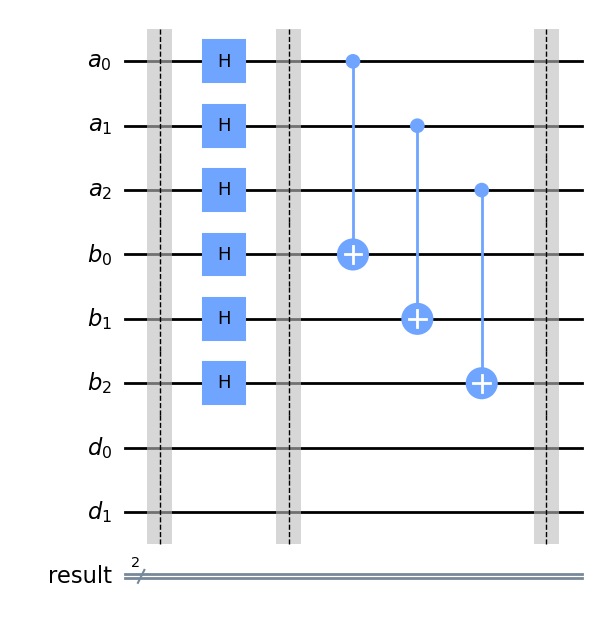

In [12]:
for i in range(3):
    qc_hamming.cx(a[i], b[i])
qc_hamming.barrier()

qc_hamming.draw('mpl')

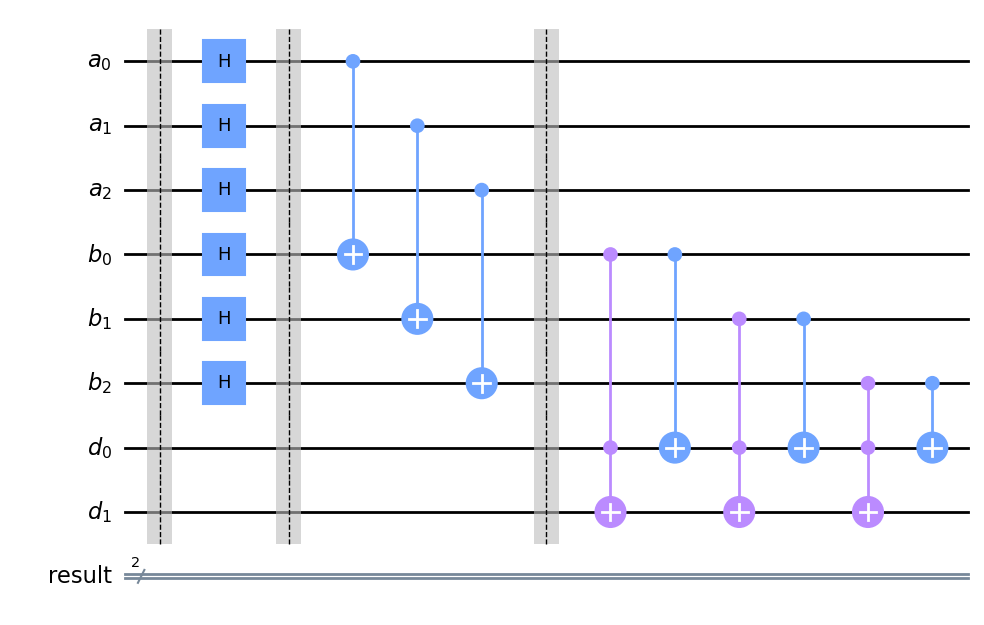

In [13]:
for i in range(3):
    for j in range(n, 0, -1):
        cnx_gate = XGate().control(j)
        qc_hamming.append(cnx_gate, [b[i]]+ d[0:j])

qc_hamming.draw('mpl')

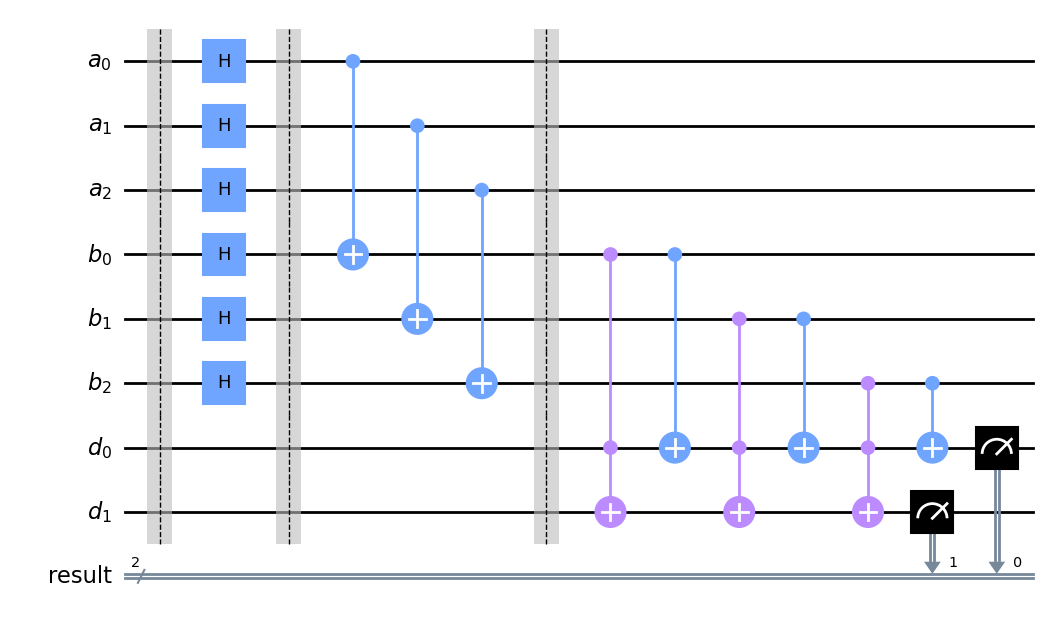

In [14]:
qc_hamming.measure(d, result)
display(qc_hamming.draw('mpl'))

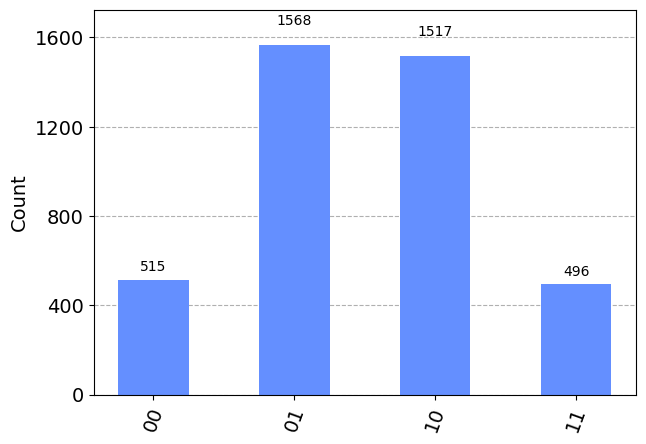

In [15]:
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc_hamming, backend, shots = 4096).result().get_counts()
plot_histogram(counts)

In [16]:
def q_hamming_distance(N):
    '''
    `N`: Number of qubits of the quantum registers.
    '''
    n = int(np.ceil(np.log2(N+1)))
    
    a = QuantumRegister(N, 'a')
    b = QuantumRegister(N, 'b')
    d = QuantumRegister(n, 'd')
    
    qc_hamming = QuantumCircuit()
    qc_hamming.add_register(a)
    qc_hamming.add_register(b)
    qc_hamming.add_register(d)
    
    qc_hamming.barrier()
    
    for i in range(N):
        qc_hamming.cx(a[i], b[i])
    qc_hamming.barrier()

    for i in range(N):
        for j in range(n, 0, -1):
            cnx_gate = XGate().control(j)
            qc_hamming.append(cnx_gate, [b[i]]+ d[0:j])
    
    return qc_hamming

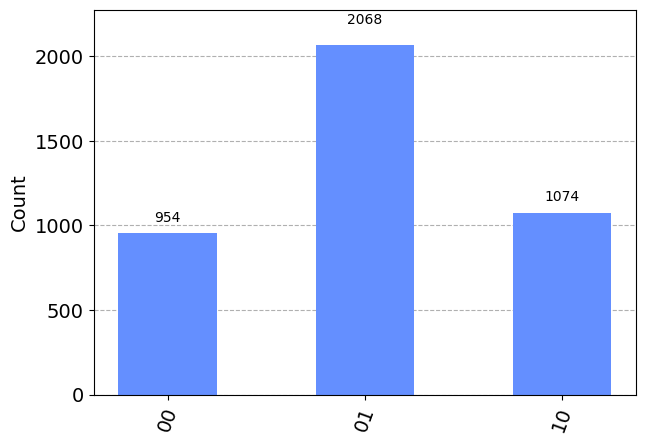

In [17]:
qc = QuantumCircuit(6, 2)
qc.initialize([0.5, 0.5, 0.5, 0.5], range(2))
qc.initialize([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)], range(2, 4))

qc.append(q_hamming_distance(2), range(6))

qc.measure(range(4, 6), range(2))

qc.draw('mpl')

backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots = 4096).result().get_counts()
plot_histogram(counts)